In [ ]:
#A simple linear regression algorithm has been implemented with numpy.
#With the help of Patrick Loeber's video on YouTube. 
#https://www.youtube.com/watch?v=4swNt7PiamQ


import numpy as np
import math

class LinearRegression:

  def __init__(self, n_iters=1000, learning_rate=0.01):
    self.iters = n_iters
    self.lr = learning_rate

  def fit(self, X, y):
    self.n_samples, self.n_features = X.shape
    self.weights = np.zeros(self.n_features)
    self.bias = 0

    for i in range(self.iters):
      y_pred = np.dot(X, self.weights) + self.bias

      #d(SSR)/dw - transpose so we get a vector with dw for all weight values
      dw = (1/self.n_samples) * np.dot(2*X.T, (y_pred - y))
      #d(SSR)/db - we only require one value for bias
      db = (1/self.n_samples) * np.sum(2*y_pred - y)

      #update rule
      self.weights -= (dw*self.lr)
      self.bias -= (db*self.lr)

  def predict(self, X_test):
    return np.dot(X_test, self.weights) + self.bias

      

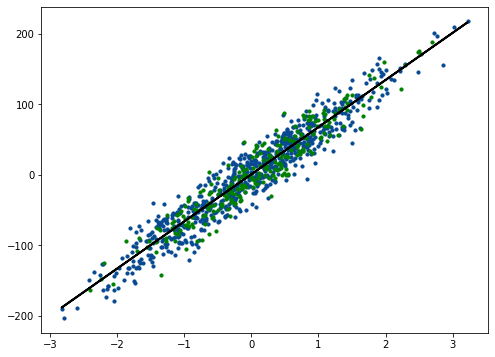

In [ ]:
#Here a sample script to test the fit of the linear regression model.

from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

X,y = datasets.make_regression(n_samples = 1000, n_features = 1, noise = 20)
X_train, X_test, y_train, y_test = train_test_split(X, y)

regressor = LinearRegression(n_iters = 1000)
regressor.fit(X_train, y_train)

y_pred_line = regressor.predict(X)
cmap = plt.get_cmap('Blues')
fig = plt.figure(figsize = (8,6))
m1 = plt.scatter(X_train, y_train, color = cmap(0.9), s=10)
m1 = plt.scatter(X_test, y_test, color = 'green', s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction')
plt.show()
